# Nettoyage

### Import des modules

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import joblib
from scipy import stats

In [113]:
df = joblib.load("df.joblib")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 37 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   id_employee                                1470 non-null   int64   
 1   age                                        1470 non-null   int64   
 2   genre                                      1470 non-null   object  
 3   revenu_mensuel                             1470 non-null   int64   
 4   statut_marital                             1470 non-null   object  
 5   departement                                1470 non-null   object  
 6   poste                                      1470 non-null   object  
 7   nombre_experiences_precedentes             1470 non-null   int64   
 8   nombre_heures_travailless                  1470 non-null   int64   
 9   annee_experience_totale                    1470 non-null   int64   
 10  annees_dans_

In [114]:
print(df.isna().sum())

id_employee                                  0
age                                          0
genre                                        0
revenu_mensuel                               0
statut_marital                               0
departement                                  0
poste                                        0
nombre_experiences_precedentes               0
nombre_heures_travailless                    0
annee_experience_totale                      0
annees_dans_l_entreprise                     0
annees_dans_le_poste_actuel                  0
a_quitte_l_entreprise                        0
nombre_participation_pee                     0
nb_formations_suivies                        0
nombre_employee_sous_responsabilite          0
code_sondage                                 0
distance_domicile_travail                    0
niveau_education                             0
domaine_etude                                0
ayant_enfants                                0
frequence_dep

In [115]:
# Voir le nombre colonne unique

for col in df.columns:
    if df[col].nunique() == 1:
        print(f"--- {col} ---")

--- nombre_heures_travailless ---
--- nombre_employee_sous_responsabilite ---
--- ayant_enfants ---


In [116]:
# Drop colonne innutiles

cols_to_drop = [
    'nombre_heures_travailless', #Constante
    'nombre_employee_sous_responsabilite', #Constante
    'ayant_enfants', #Constante
    'eval_number', #Jointure
    'id_employee', #Jointure
    'code_sondage', #Jointure
]

df = df.drop(columns=cols_to_drop)


### Transformation

In [117]:
df['augementation_salaire_precedente'] = df['augementation_salaire_precedente'].apply(
    lambda x: float(str(x).replace('%', '')) / 100
)

### Outliers

In [118]:
from scipy import stats

outlier_report_z = {}
num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    z_scores = stats.zscore(df[col])
    outliers = (abs(z_scores) > 3).sum()
    if outliers > 0:
        outlier_report_z[col] = outliers

print("Colonnes avec outliers détectés :", outlier_report_z)


Colonnes avec outliers détectés : {'annee_experience_totale': 16, 'annees_dans_l_entreprise': 25, 'annees_dans_le_poste_actuel': 13, 'annees_depuis_la_derniere_promotion': 42, 'annes_sous_responsable_actuel': 14}


Nombre de lignes Avant 1470


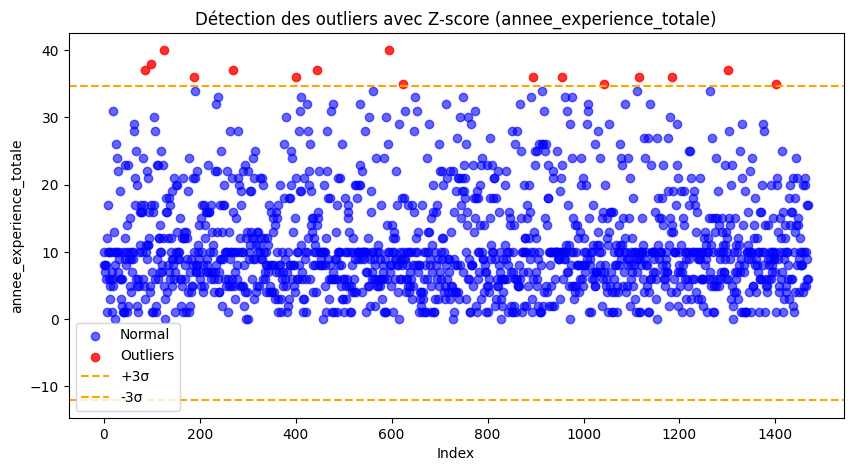

Nombre de lignes Après 1454


In [119]:

col = "annee_experience_totale"

print(f"Nombre de lignes Avant {df.shape[0]}")


z_scores = stats.zscore(df[col])
mask = np.abs(z_scores) <= 3   
outliers = ~mask            

plt.figure(figsize=(10,5))

plt.scatter(df.index[mask], df[col][mask], color="blue", alpha=0.6, label="Normal")
plt.scatter(df.index[outliers], df[col][outliers], color="red", alpha=0.8, label="Outliers")

mean, std = df[col].mean(), df[col].std()
plt.axhline(mean + 3*std, color="orange", linestyle="--", label="+3σ")
plt.axhline(mean - 3*std, color="orange", linestyle="--", label="-3σ")

plt.title(f"Détection des outliers avec Z-score ({col})")
plt.xlabel("Index")
plt.ylabel(col)
plt.legend()
plt.show()

# Suppresion outlier
df = df[mask].copy()
print(f"Nombre de lignes Après {df.shape[0]}")


Nombre de lignes Avant 1454


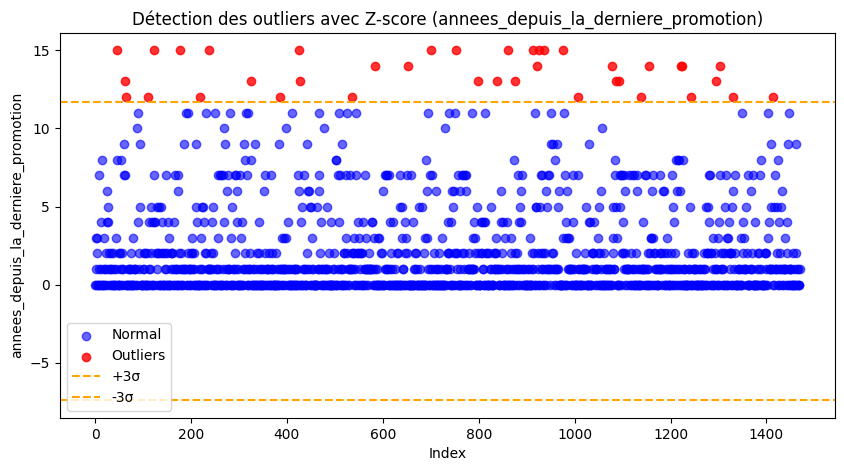

Nombre de lignes Après 1415


In [120]:

col = "annees_depuis_la_derniere_promotion"

print(f"Nombre de lignes Avant {df.shape[0]}")


z_scores = stats.zscore(df[col])
mask = np.abs(z_scores) <= 3   
outliers = ~mask            

plt.figure(figsize=(10,5))

plt.scatter(df.index[mask], df[col][mask], color="blue", alpha=0.6, label="Normal")
plt.scatter(df.index[outliers], df[col][outliers], color="red", alpha=0.8, label="Outliers")

mean, std = df[col].mean(), df[col].std()
plt.axhline(mean + 3*std, color="orange", linestyle="--", label="+3σ")
plt.axhline(mean - 3*std, color="orange", linestyle="--", label="-3σ")

plt.title(f"Détection des outliers avec Z-score ({col})")
plt.xlabel("Index")
plt.ylabel(col)
plt.legend()
plt.show()

# Suppresion outlier
df = df[mask].copy()
print(f"Nombre de lignes Après {df.shape[0]}")


Nombre de lignes Avant 1415


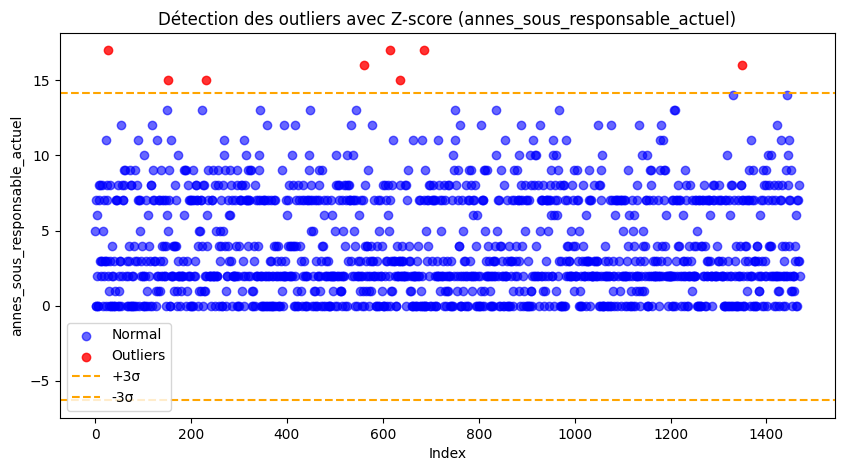

Nombre de lignes Après 1407


In [121]:

col = "annes_sous_responsable_actuel"

print(f"Nombre de lignes Avant {df.shape[0]}")


z_scores = stats.zscore(df[col])
mask = np.abs(z_scores) <= 3   
outliers = ~mask            

plt.figure(figsize=(10,5))

plt.scatter(df.index[mask], df[col][mask], color="blue", alpha=0.6, label="Normal")
plt.scatter(df.index[outliers], df[col][outliers], color="red", alpha=0.8, label="Outliers")

mean, std = df[col].mean(), df[col].std()
plt.axhline(mean + 3*std, color="orange", linestyle="--", label="+3σ")
plt.axhline(mean - 3*std, color="orange", linestyle="--", label="-3σ")

plt.title(f"Détection des outliers avec Z-score ({col})")
plt.xlabel("Index")
plt.ylabel(col)
plt.legend()
plt.show()

# Suppresion outlier
df = df[mask].copy()
print(f"Nombre de lignes Après {df.shape[0]}")


In [122]:
joblib.dump(df, "df.joblib")

['df.joblib']